## Diabetes

In this example, we'll explore cross-validation by means of a diabetes example. The goal is to produce classifications of either "-1" or "1". We don't know exactly what the output or features are meant to represent; it doesn't really matter for this illustration!

In [7]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, average_precision_score
from sklearn.svm import SVC

import matplotlib.pyplot as plt

In [2]:
X, y = load_svmlight_file("diabetes_scale")

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
y_actual = y_test

In [4]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

svc_model = SVC()

# By default GridSearchCV uses 3-fold cross-validation. Using more folds would be nice but
# can be rather slow as we have to retrain the model for each fold.
# Specifying refit=True refits the model using the best parameters over the whole dataset,
# allowing us to use grid_search_model directly for predictions after training
grid_search_model = GridSearchCV(estimator=svc_model,
                                 param_grid=param_grid,
                                 refit=True)
grid_search_model.fit(X_train, y_train)
grid_search_model.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
y_pred = grid_search_model.predict(X_test)

print("Precision = {0:.3f}, Recall = {1:.3f}".format(precision_score(y_actual, y_pred),
                                                     recall_score(y_actual, y_pred)))


Precision = 0.837, Recall = 0.923


## A big difference...

Note that in the following, we're using a *decision function* instead of just outputting the prediction itself. For an SVM, this is the distance to the hyperplane; usually a negative distance would be interpreted as a "no" and a positive distance as a "yes". You can view this score as telling us how confident the model is in its prediction.

What we'd like to do is figure out a threshold above which we should view the decision function's score as a "yes". Trying out different values of this threshold gives rise to the precision-recall curve below.

Some example scores from the decision function: [-1.87340352  1.15841088  1.63443049 -0.38456949  1.31531154  2.16852864
 -0.68797022 -1.06783266  0.1591424   0.56784891]
Average precision is 0.940198998212


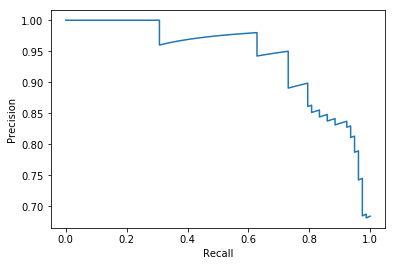

In [6]:
y_pred_scores = grid_search_model.decision_function(X_test)

print("Some example scores from the decision function:", y_pred_scores[:10])

average_precision = average_precision_score(y_actual, y_pred_scores)
precisions, recalls, _ = precision_recall_curve(y_actual,
                                                y_pred_scores)

print("Average precision is", average_precision)
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()